# Lab 4 Objective

In the last Lab Exercise, you have identified and analyzed some of the most relevant numeric variables in this dataset,
which may affect the sale price of a house, and hence, will probably be most relevant in predicting “SalePrice”. In this
Lab Exercise, you will utilize some of those numeric variables to perform Linear Regression and predict “SalePrice”.

Typical steps to follow while building a supervised machine learning model on a given dataset:

o Partition the labeled dataset into two random portions – 80% to Train the model and 20% to Test the model.

o Fit the desired supervised machine learning model on the Train set to predict response using the predictors.

o Predict response using the predictors on the Test set using the machine learning model fit on the Train data.

o Check the Goodness of Fit of the model on Train set using R^2 and Prediction Accuracy on Test set using MSE.

Marks distribution

3 points for Problem 1 2 points for train-test set and regression in (a) + 1 point for metrics in (b)

3 points for Problem 2 2 points for the two regressions + 1 point for comparison and justifications

4 points for Problem 3 2 points for outlier removal in (a) + 1 point for model in (b) + 1 point for (c)

## Importing the Essential Libraries and data (NEW: sklearn)

In [28]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
sb.set()

print(type(house_prices))
print(house_prices.shape)
house_prices = pd.read_csv('train.csv')
house_prices.head()

<class 'pandas.core.frame.DataFrame'>
(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Crafting the Required Functions for efficiency:

In [34]:
def lr(X, y, df):
    
    
    X = pd.DataFrame(df[X])
    y = pd.DataFrame(df[y])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model = LinearRegression()
    model.fit(X_train ,y_train)
    
    print('Intercept \t: b = ', model.intercept_)
    print('Coefficients \t: a = ', model.coef_)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = model.intercept_ + model.coef_ * X_train
    
    # Predict Response corresponding to Predictors
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
   
    f, axes = plt.subplots(1, 2, figsize=(24, 12))

    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression for Training Set")
    
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction for Testing Set")
    plt.show()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", model.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()
    
# function to test goodness of fit using the Test Set
def gof_func(predictor, response):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(
        predictor, response, test_size=0.20
    )

    # Linear Regression using Train Data
    linreg = LinearRegression()  # create the linear regression object
    linreg.fit(X_train, y_train)  # train the linear regression model

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Mean Squared Error (MSE)
    def mean_sq_err(actual, predicted):
        """Returns the Mean Squared Error of actual and predicted values"""
        return np.mean(np.square(np.array(actual) - np.array(predicted)))

    mse = mean_sq_err(y_test, y_test_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
    
            
def remove_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    df_out = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
    count = ( ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr) ))).sum()
    print(count)
    return df_out

# Problems

### Problem 1 : Predicting SalePrice using GrLivArea

Note : We observed during EDA that GrLivArea and SalePrice have a strong linear relationship with correlation 0.71.
In this problem, you will build a Linear Regression model to predict SalePrice using GrLivArea and judge its accuracy.

a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train
set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.

b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.
Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.


Hints and Pointers

o If you take just the first 80% of the data as train and the next 20% as test, it may not be the best train test split.

o If you obtain the coefficients for the regression line (intercept and coef), it should be easy to plot the line too.

o Goodness of Fit on train depends on the variance you explain, while prediction accuracy depends on the errors.

## Uni-Variate Linear Regression

We will start by setting up a Uni-Variate Linear Regression problem.   

Response Variable : **SalePrice**     
Predictor Feature : **GrLivArea**    

> Regression Model : SalePrice = $a$ $\times$ GrLivArea + $b$  

Extract the variables and the associated data as a Pandas `DataFrame`.

Set up the regression problem with Train and Test datasets.   
Train Set with 1168 samples (80%) and Test Set with 332 samples (20%).


Intercept 	: b =  [19797.79461891]
Coefficients 	: a =  [[107.37967578]]


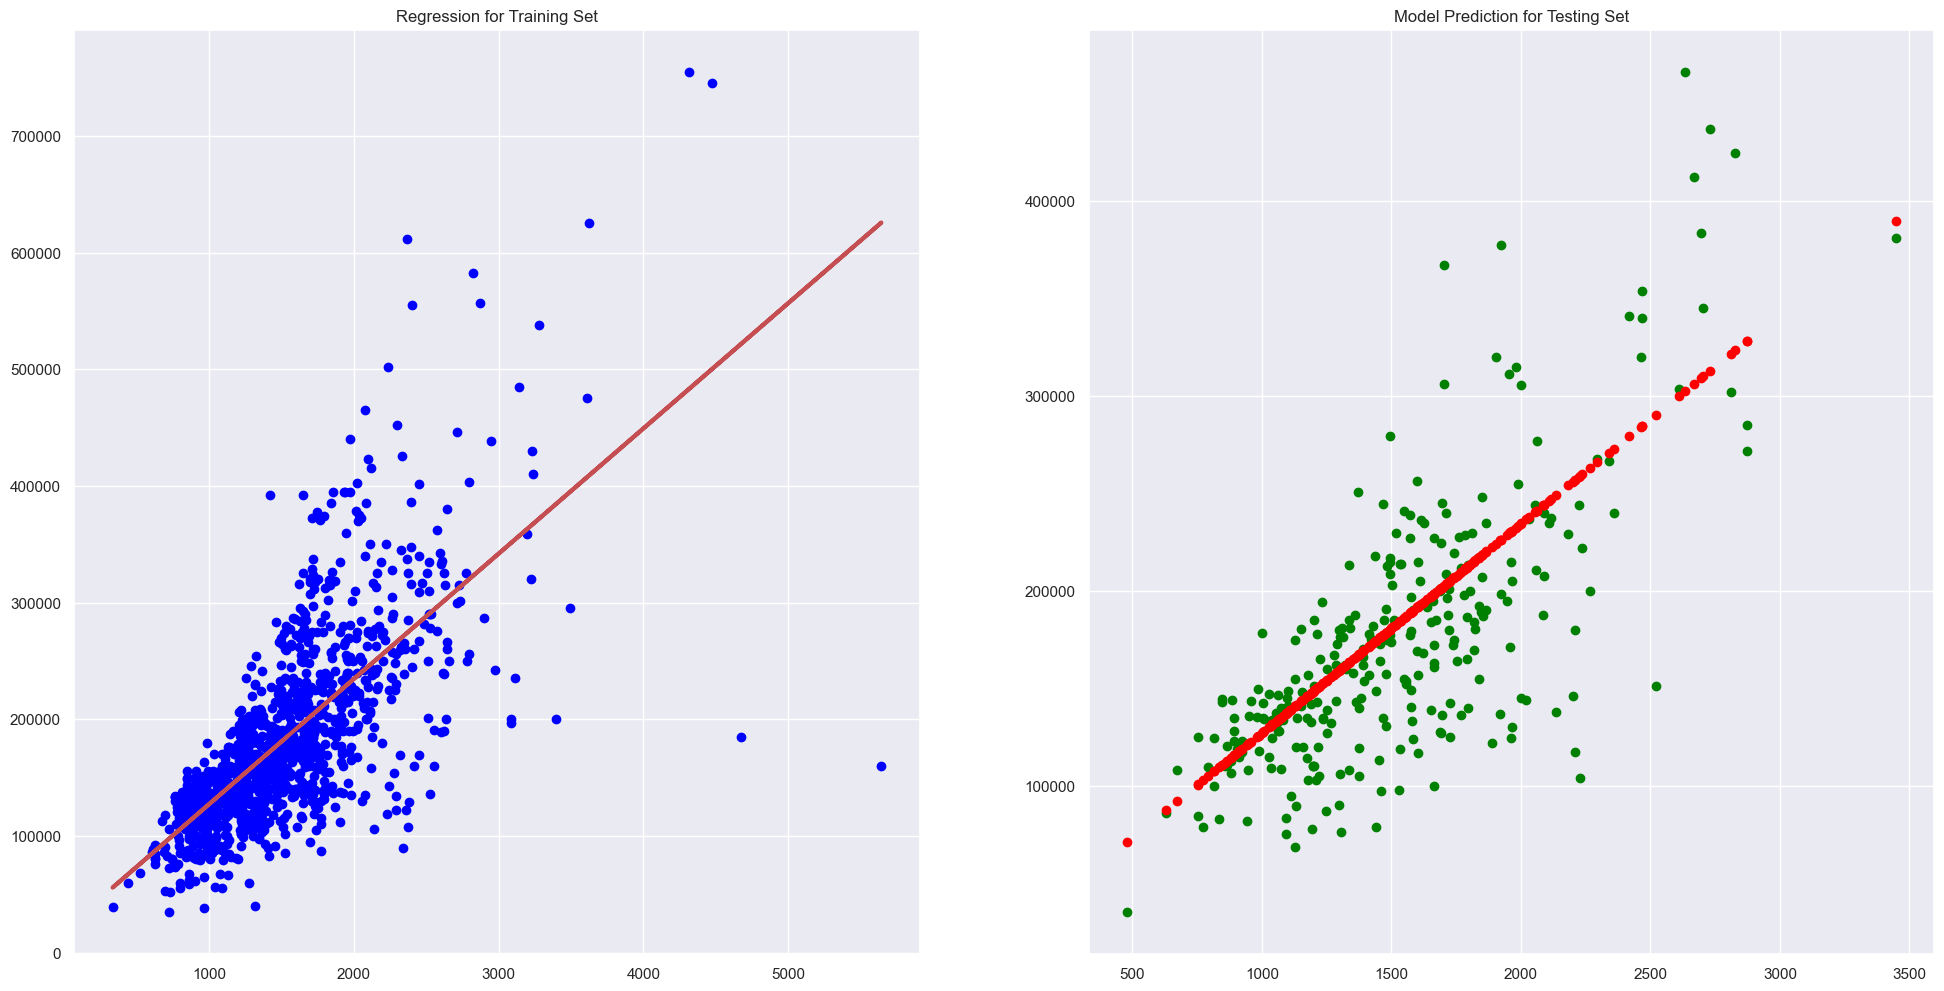

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.496536301978438
Mean Squared Error (MSE) 	: 3386417733.3786783

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.527562681358432
Mean Squared Error (MSE) 	: 2166536682.919259



In [31]:
lr(X='GrLivArea', y='SalePrice', df=house_prices)

In this case, Goodness of Fit on train depends on the variance you explain, while prediction accuracy depends on the errors, ie. the explained variance (R^2) and Mean Squared Error (MSE).

### Problem 2 : Predicting SalePrice using Other Variables

Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice
using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.

Hints and Pointers

o Same as Problem 1, just on other variables. You can compare models using the metrics you are printing anyway.

o Optional: You may think of writing a simple Python function to do regression on some variables in a given dataset.

## Tackling the TotalBsmtSF first:

We will start by setting up a Uni-Variate Linear Regression problem.   

Response Variable : **SalePrice**     
Predictor Feature : **TotalBsmtSF**    

> Regression Model : SalePrice = $a$ $\times$ TotalBsmtSF + $b$  

Intercept 	: b =  [66362.24586963]
Coefficients 	: a =  [[109.09798431]]


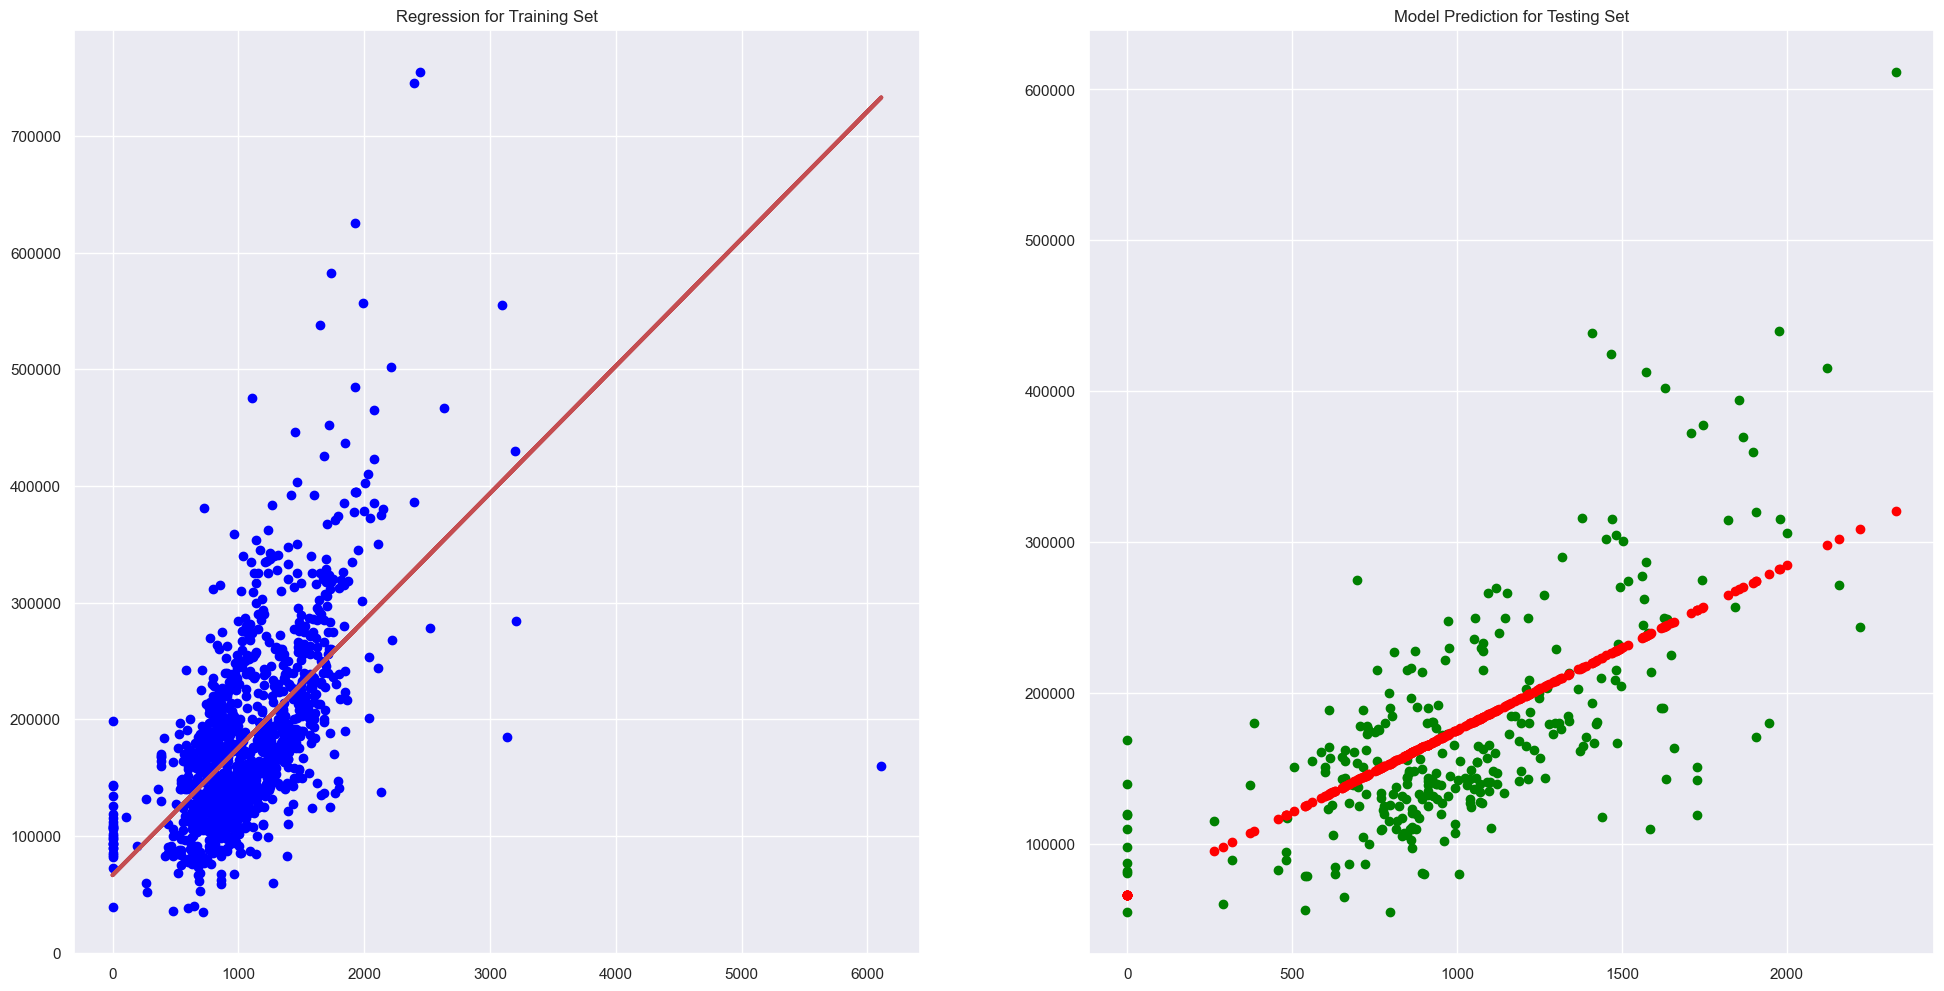

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3606200463655407
Mean Squared Error (MSE) 	: 4131907381.9384646

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.44212874258149915
Mean Squared Error (MSE) 	: 3141507401.2029166



In [22]:
lr(X='TotalBsmtSF', y='SalePrice', df=house_prices)

## Tackling the GarageArea next:

We will start by setting up a Uni-Variate Linear Regression problem.   

Response Variable : **SalePrice**     
Predictor Feature : **GarageArea**    

> Regression Model : SalePrice = $a$ $\times$ GarageArea + $b$  

Intercept 	: b =  [70929.8133402]
Coefficients 	: a =  [[234.85660477]]


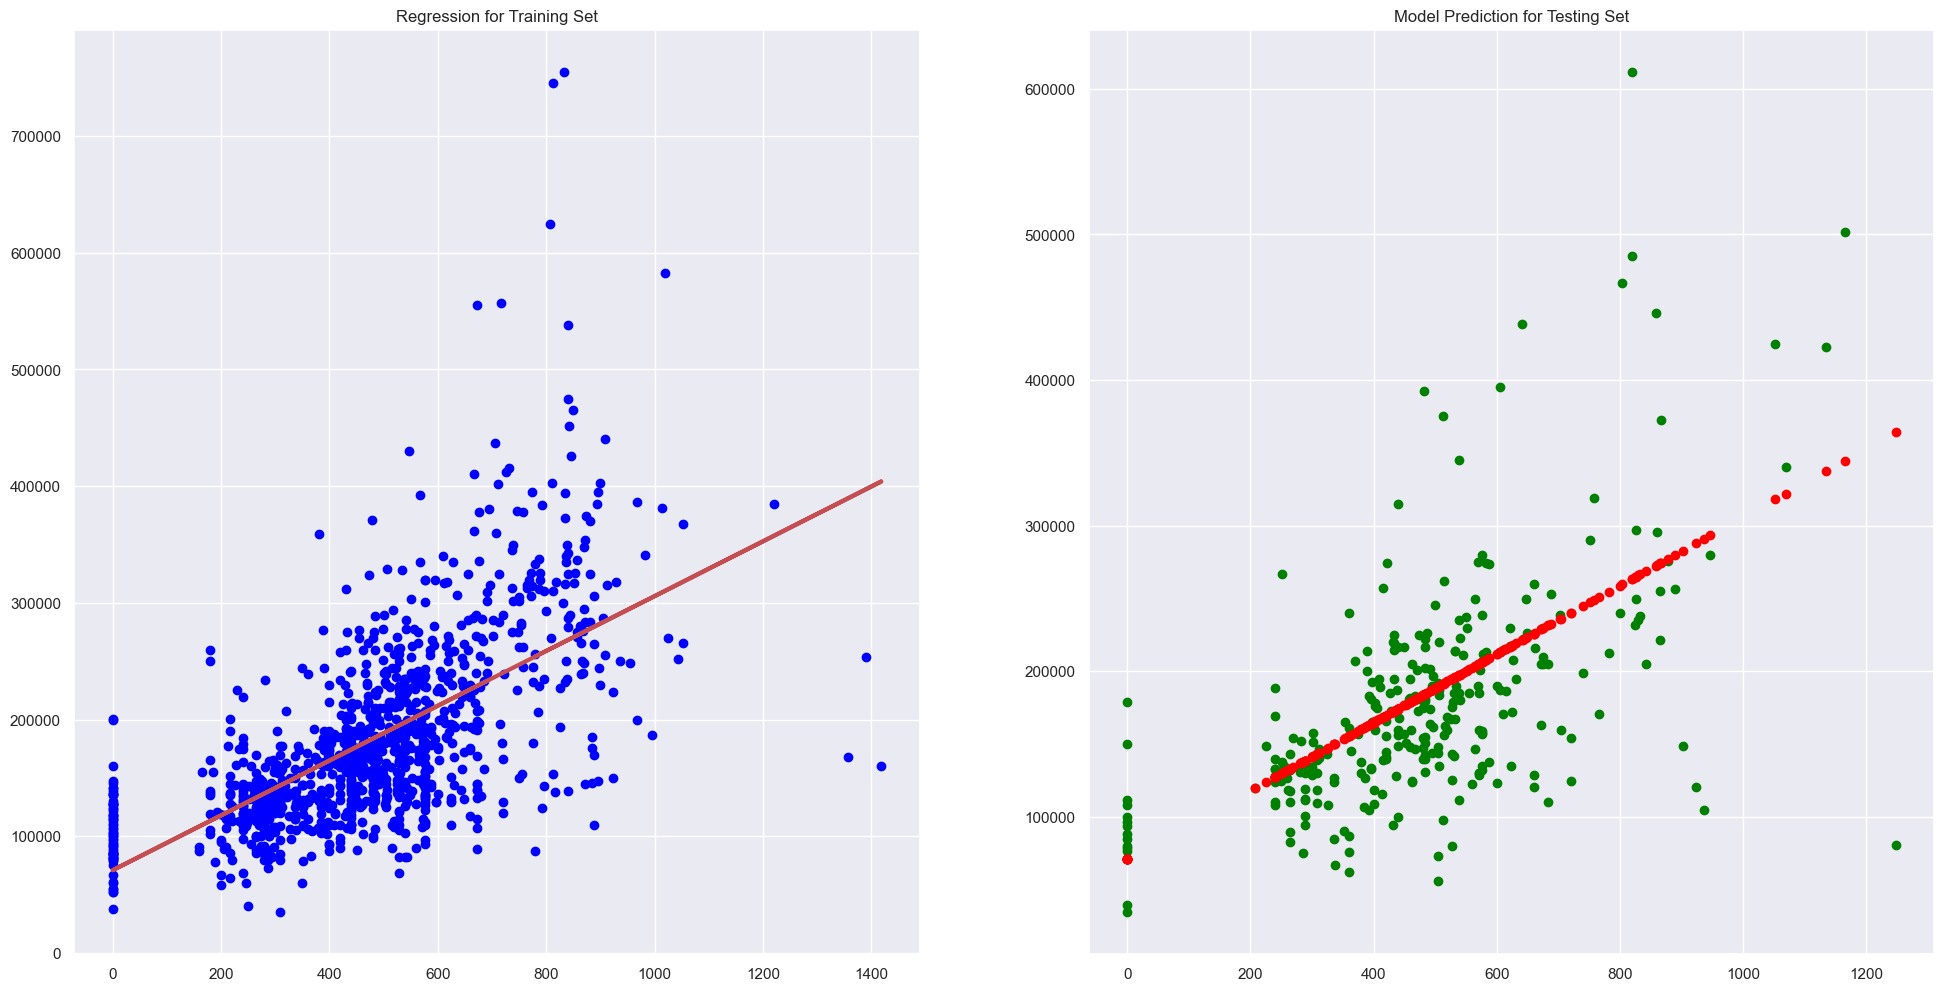

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4006552712424388
Mean Squared Error (MSE) 	: 3812036172.790112

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.33627612612789703
Mean Squared Error (MSE) 	: 4037910595.0221324



In [23]:
lr(X='GarageArea', y='SalePrice', df=house_prices)

In [33]:
#compare the  three model----------------------------------------------------------------
print("GrLivArea vs. SalePrice")
gof_func(grlivarea,saleprice)
print("")
print("TotalBsmtSF vs. SalePrice")
gof_func(totalbsmtsf,saleprice)
print("")
print("GaragArea vs. SalePrice")
gof_func(garagearea,saleprice)

GrLivArea vs. SalePrice
Mean Squared Error (MSE) 	: 2514592078.582773
Root Mean Squared Error (RMSE) 	: 50145.708476227286

TotalBsmtSF vs. SalePrice
Mean Squared Error (MSE) 	: 4261665992.6302047
Root Mean Squared Error (RMSE) 	: 65281.436814995155

GaragArea vs. SalePrice
Mean Squared Error (MSE) 	: 3172791611.273948
Root Mean Squared Error (RMSE) 	: 56327.5386580485


GrLivArea has the lowest Root Mean Square Error value, thus, I conclude among the three models, the model between GrLivArea and SalePrice is the best to predict.

### Problem 3 : Refining the Models to Predict SalePrice

In this problem, you will consider finer details of the dataset and the variables to refine the model to predict SalePrice.

(a) Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea
UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.

(b) In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on
the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.

(c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.
Hints and Pointers

o In Part (a), there are houses that are outliers on both variables (intersection), but we really want the “union”.

o Part (b) is the same as Problem 1, just on the new outlier-free dataset. Check that the data now has less rows.

o Part (c) is the same as Problem 2, but keep in mind that the dataset has changed in this case, not the variables.

### Removing the Outliers

SalePrice    61
GrLivArea    31
dtype: int64


,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


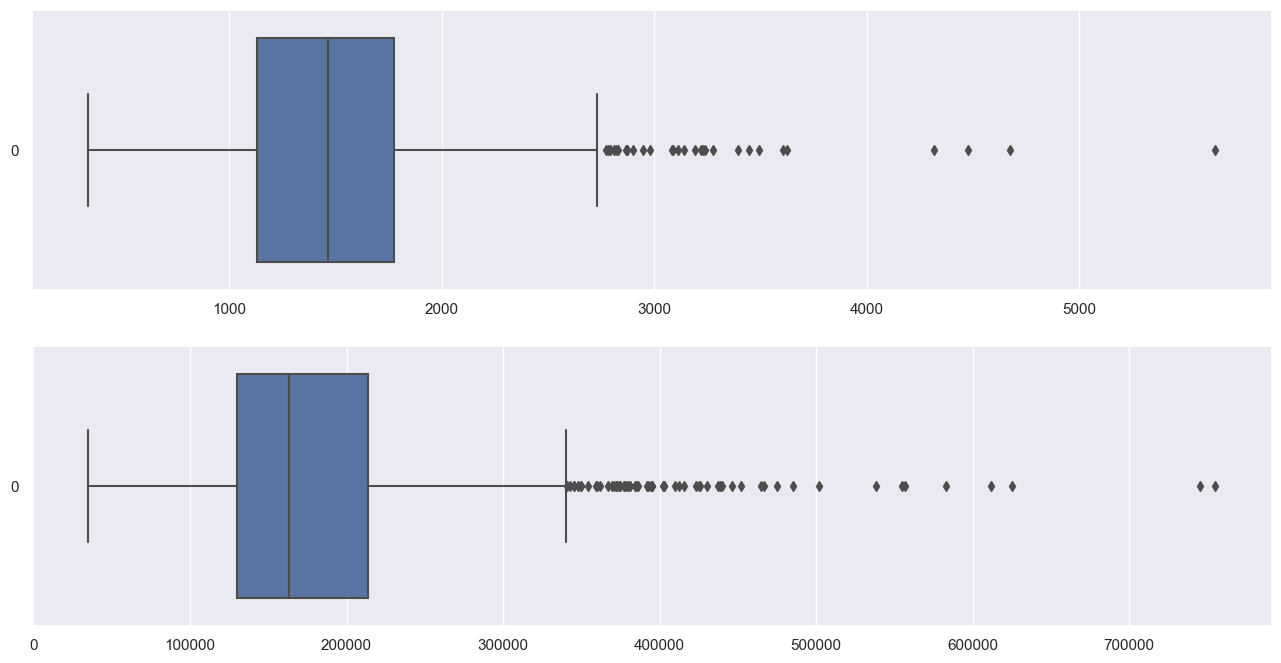

In [36]:
combined = pd.DataFrame(house_prices[['SalePrice', 'GrLivArea']])  

f, axes = plt.subplots(2, 1, figsize=(16, 8))
sb.boxplot(data = combined["GrLivArea"], orient = "h", ax = axes[0])
sb.boxplot(data = combined["SalePrice"], orient = "h", ax = axes[1])

filtered_combined = remove_outliers(combined)
filtered_combined.head()

### Plotting the Linear Regression Model using previously built function:

Intercept 	: b =  [30281.81824137]
Coefficients 	: a =  [[95.67326303]]


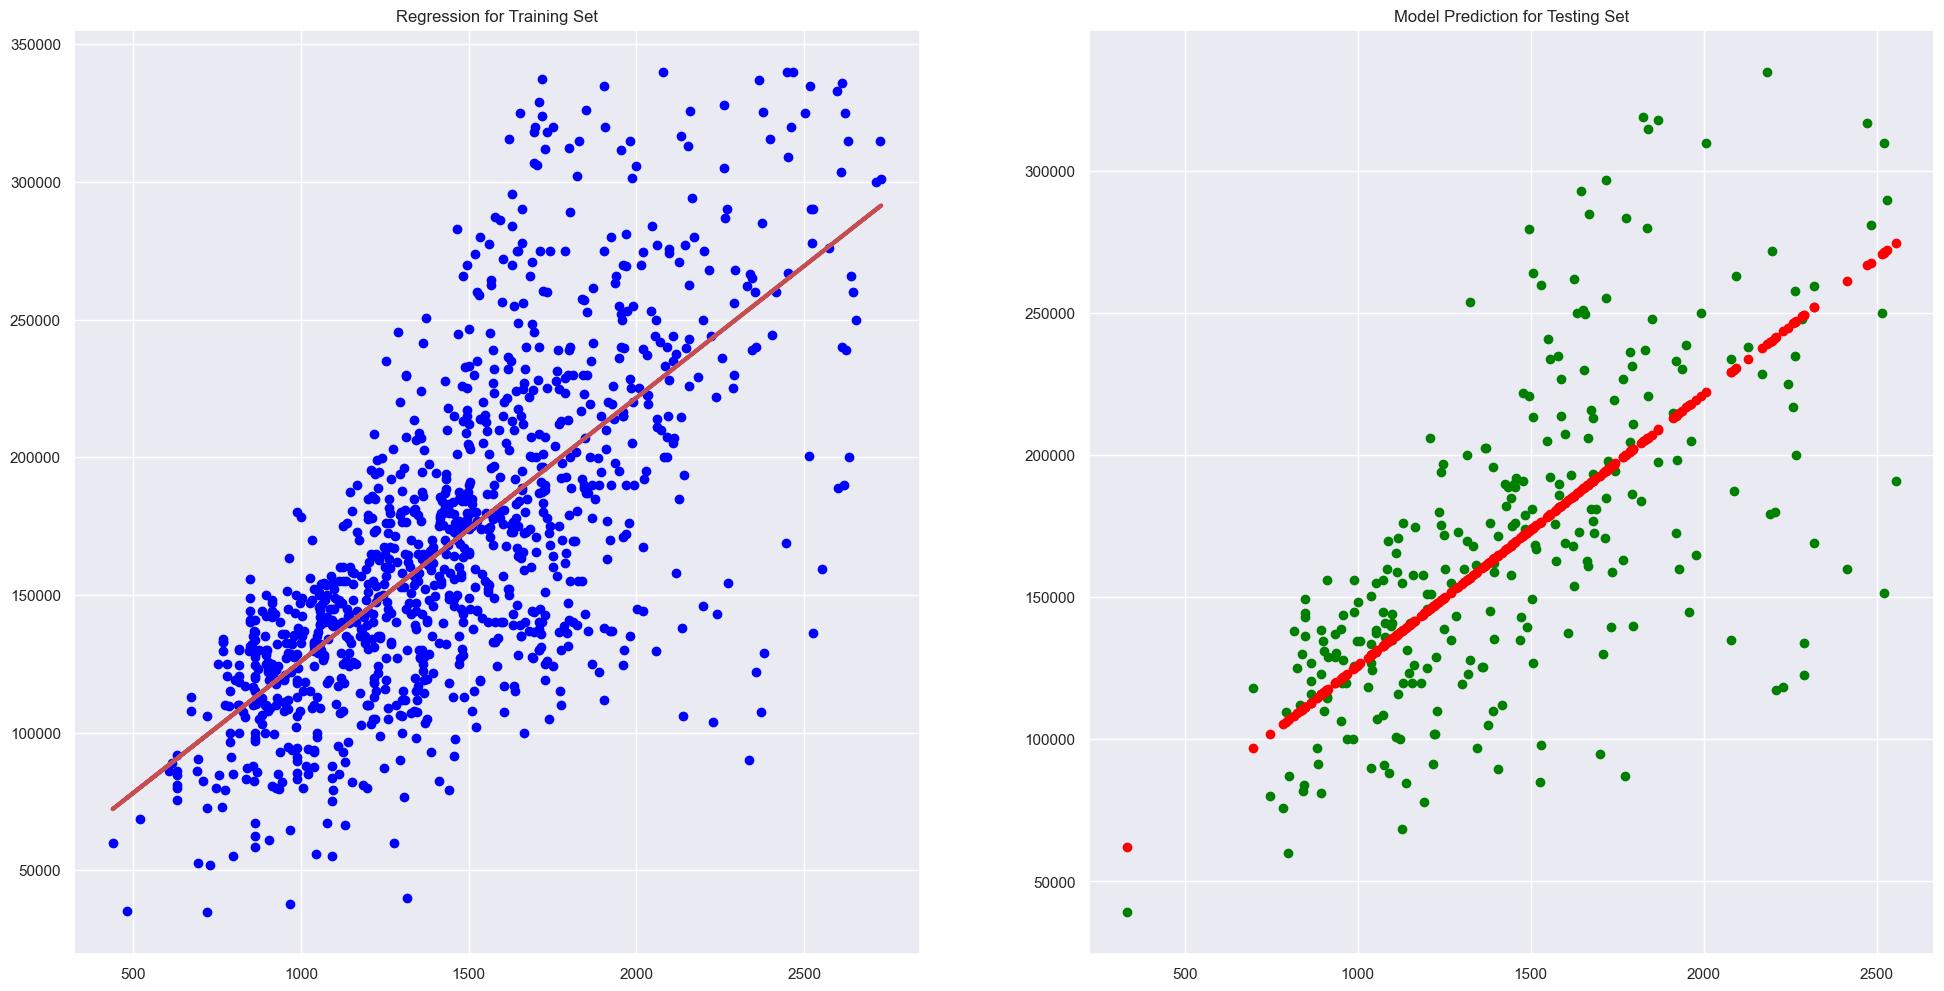

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.48976048531380234
Mean Squared Error (MSE) 	: 1795638950.7309093

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4193760080825034
Mean Squared Error (MSE) 	: 1819807473.9033308



In [26]:
lr(X='GrLivArea', y='SalePrice', df=filtered_combined)

Comparing to the model obtained in Question 1, the Explained Variance on the train set did not change much but the Root Mean Squared Error is significantly lower. Thus, I conclude that the new model is better than the original model in terms of prediction.